# Deskripsi proyek

Project ini dilatarbelakangi karena salah satu Retail bahan bangunan 'Home World' membuat program loyalitas pelanggan dengan memiliki kartu keanggotaan dengan biaya $20 per bulannya, program ini mencakup diskon, informasi tentang penawaran khusus dan hadiah. Untuk mengetahui apakah program ini efektif atau tidak terhadap peningkatan pembelian rata-rata dan jumlah item dalam keranjang oleh karena itu project analisis data ini dilakukan dengan tujuan untuk mengetahui apakah program loyalitas pelanggan ini benar-benar menghasilkan pertumbuhan yang diharapkan dalam ukuran pembelian rata-rata dan jumlah item dalam keranjang sesuai dengan yang diharapkan atau tidak sehingga kedepannya ratail bahan bangunan Home World dapat membuat strategi penjualan yang lebih efektif lagi terhadap peningkatan penjualan.

# Langkah-langkah menyelesaikan proyek

1. Memuat library dan data


2. Pra-pemrosesan data:
    - Mengubah data ke tipe yang dibutuhkan
    - Mengidentifikasi dan mengisi nilai-nilai yang hilang
    - Menghapus data duplikat
3. Melakukan Analisis Data Eksploratif 
    - Berapa jumlah pelanggan selama periode waktu antara member dengan non-member.
    - Berapa rata-rata pembellian antara member dengan non-member.
     - menganalisis perubahan ukuran pembelian rata-rata untuk setiap kohort untuk yang member dengan non-member.
4. Merumuskan dan menguji hipotesis statistic
    - Rata-rata pendapatan pelanggan antara yang member dengan non-member adalah berbeda
    - Rata-rata pembelian pelanggan antara yang member dengan non-member adalah berbeda
5. Kesimpulan
    - Menuliskan kesimpulan: sampaikan kepada para spesialis pemasaran mengenai kesimpulan analisis data dari program loyalitas yang telah dilakukan, apakah efektif atau tidak? dan apakah ada rekomendasi strategi penjualan yang perlu dilakukan selanjutnya untuk meningkatkan penjualan?

# Deskripsi data

Tabel `Retail` (berisi data terkait pembelian dan informasi loyalitas pelanggan):
- purchaseId = ID pembelian
- Item_ID = ID barang
- purchasedate = Tanggal pembelian
- Quantity = Jumlah barang yang dibeli
- CustomerID = ID pelanggan
- ShopID = ID toko
- loyalty_program = pelanggan adalah anggota dari program loyalitas atau tidak

Tabel `product_codes` (berisi data terkait harga barang):
- productID = ID barang
- price_per_one = Harga barang persatuan

## Memuat library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats as st
import seaborn as sns
from operator import attrgetter

## Memuat data

In [2]:
retail = pd.read_csv('/Users/VISKA/Downloads/retail_dataset_us.csv')

In [3]:
product = pd.read_csv('/Users/VISKA/Downloads/product_codes_us.csv')

## Pra-pemrosesan data

- **Retail**

In [4]:
# mengubah huruf kapital pada nama kolom
retail = retail.rename(columns=lambda x: x.lower())
retail.head()

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [5]:
# menampilkan informasi retail
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_id          105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   customerid       69125 non-null   float64
 5   shopid           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [6]:
# mengubah tipe data
retail['purchasedate'] = pd.to_datetime(retail['purchasedate'])
retail['loyalty_program'] = retail['loyalty_program'].astype(int)
retail.dtypes

purchaseid                 object
item_id                    object
quantity                    int64
purchasedate       datetime64[ns]
customerid                float64
shopid                     object
loyalty_program             int32
dtype: object

In [7]:
# Mengatasi nilai yang hilang
retail[retail['customerid'].isna()]

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0
11,541696,22197,4,2017-01-20 18:08:00,NaN,Shop 0,0
16,539744,22300,5,2016-12-21 15:21:00,NaN,Shop 0,0
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,NaN,Shop 0,0
105326,540681,22227,1,2017-01-10 16:25:00,NaN,Shop 0,0
105327,538349,22625,0,2016-12-10 14:59:00,NaN,Shop 0,0
105329,540154,22134,3,2017-01-05 11:30:00,NaN,Shop 0,0


Terdapat 36210 nilai yang hilang pada kolom customerid, untuk mengisi nilai yang hilang dikolom customerid saya isi nilinya dengan nilai 0

In [8]:
# Mengganti NaN dengan 0
retail['customerid'] = retail['customerid'].fillna(0)

In [9]:
# Menghitung kembali NaN
retail['customerid'].isna().sum()

0

In [10]:
retail['quantity'].min()

-74216

In [11]:
# Mengubah nilai pada kolom quantity menjadi nilai yang absolute
retail['quantity'] = retail['quantity'].abs()

In [12]:
retail['quantity'].min()

0

In [13]:
# Menampilkan informasi retail
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   customerid       105335 non-null  float64       
 5   shopid           105335 non-null  object        
 6   loyalty_program  105335 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 5.2+ MB


In [14]:
# Memeriksa data duplikat
retail[retail.duplicated()]

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program
5345,537265,21499,24,2016-12-06 11:26:00,21598.0,Shop 0,0
5863,540803,21485,0,2017-01-11 12:30:00,20348.0,Shop 0,0
6893,540524,21326,11,2017-01-09 12:53:00,22414.0,Shop 0,1
7821,537192,22585,0,2016-12-05 13:42:00,22081.0,Shop 0,1
10806,537772,22080,4,2016-12-08 12:35:00,23722.0,Shop 0,1
...,...,...,...,...,...,...,...
105164,542224,22178,5,2017-01-26 12:45:00,23567.0,Shop 0,1
105173,544153,82552,1,2017-02-16 12:11:00,21035.0,Shop 0,0
105178,540839,21123,0,2017-01-11 15:42:00,22470.0,Shop 0,1
105229,543277,21533,0,2017-02-06 14:33:00,21487.0,Shop 0,0


Terdapat 1033 data duplikat pada dataframe retail, unutk mengatasi hal ini maka data duplikat akan dihapus

In [15]:
# Menghapus data duplikat
retail = retail.drop_duplicates()
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchasedate     104302 non-null  datetime64[ns]
 4   customerid       104302 non-null  float64       
 5   shopid           104302 non-null  object        
 6   loyalty_program  104302 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 6.0+ MB


Tipe data pada dataset Retail seudah sesuai, nilai yang hilang sudah ditangani dan data duplikat sudah di hapus.

- **Product**

In [16]:
# mengubah huruf kapital pada nama kolom
product = product.rename(columns=lambda x: x.lower())
product.head()

,productid,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [17]:
# menampilkan informasi retail
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productid      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [18]:
# memeriksa data duplikat
product[product.duplicated()]

,productid,price_per_one


Tipe data pada dataframe Product sudah sesuai, tidak ada nilai yang hilang dan tidak ada data duplikat

## Melakukan Analisis Data Eksploratif

### Berapa jumlah pelanggan selama periode waktu antara member dengan non-member.

In [19]:
retail['date'] = retail['purchasedate'].dt.date
retail['session_year'] = retail['date'].astype('datetime64[Y]')
retail['session_month'] = retail['date'].astype('datetime64[M]')
retail['session_week'] = retail['date'].astype('datetime64[W]')
retail.head()

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-01-01,2016-12-01,2016-12-08
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-01-01,2016-12-01,2016-12-08
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-01-01,2017-02-01,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-01-01,2017-02-01,2017-02-09


#### Jumlah pelanggan setiap bulan

In [20]:
# jumlah pelanggan setiap bulan
total_cust_month = retail.groupby(['loyalty_program', 'session_month']).agg({'purchaseid':'nunique'})
total_cust_month 

purchaseid
loyalty_program session_month            
0               2016-12-01           1418
                2017-01-01           1132
                2017-02-01           1000
1               2016-12-01            607
                2017-01-01            344
                2017-02-01            393

<Axes: title={'center': 'Jumlah pelanggan member dan non member setiap bulan'}, xlabel='loyalty_program', ylabel='Jumlah pelanggan'>

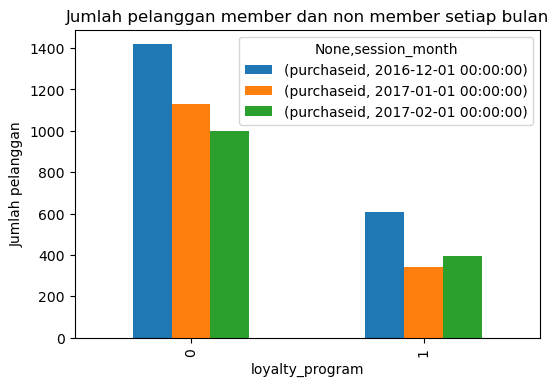

In [21]:
total_cust_month.unstack().plot(kind = 'bar', stacked = False,
                 title='Jumlah pelanggan member dan non member setiap bulan', 
                ylabel='Jumlah pelanggan',figsize=(6,4))

Jumlah pelanggan yang mengunjungi retail Home World setiap bulannya paling banyak yaitu pada pelanggan yang non member di bulan desember 2016, jika dilihat pada grafik diatas terlihat bahwa jumlah pelanggan yang non member lebih banyak dari pada pelanggan yang member.

#### Jumlah pelanggan setiap minggu

In [22]:
# jumlah pelanggan setiap minggu
total_cust_week = retail.groupby(['loyalty_program', 'session_week']).agg({'purchaseid':'nunique'})
total_cust_week

purchaseid
loyalty_program session_week            
0               2016-12-01           516
                2016-12-08           490
                2016-12-15           361
                2016-12-22            51
                2016-12-29            45
                2017-01-05           325
                2017-01-12           223
                2017-01-19           251
                2017-01-26           353
                2017-02-02           236
                2017-02-09           239
                2017-02-16           258
                2017-02-23           202
1               2016-12-01           241
                2016-12-08           211
                2016-12-15           146
                2016-12-22             9
                2016-12-29            12
                2017-01-05            83
                2017-01-12            81
                2017-01-19            87
                2017-01-26           102
                2017-02-02            88
                2017-02-09           102
                2017-02-16           103
                2017-02-23            79

<Axes: title={'center': 'Jumlah pelanggan member dan non member setiap minggu'}, xlabel='loyalty_program', ylabel='Jumlah pelanggan'>

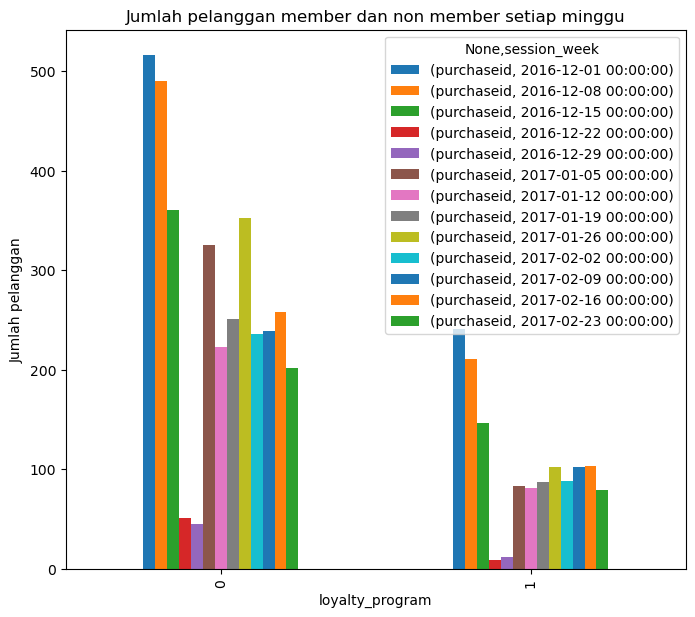

In [23]:
total_cust_week.unstack().plot(kind = 'bar', stacked = False,
                  title='Jumlah pelanggan member dan non member setiap minggu', 
                  ylabel='Jumlah pelanggan',figsize=(8,7))

Secara keseluruhan jumlah pelanggan yang member lebih banyak dibandingkan pelanggan non member, sepertinya pada minggu ke 4 dan ke 5 tepatnya minggu-minggu di akhir tahun jumlah pelanggan yang melakukan pembelian di toko Home World lebih sedikit dibandingkan di minggu-minggu yang lain. hal ini mungkin karena diakhir tahun banyak pelanggan yang melakukan liburan natal dan liburan akhir tahun sehingga sedikit yang berbelanja di toko retail.

#### Jumlah pelanggan setiap hari

In [24]:
# jumlah pelanggan setiap hari
total_cust_day = retail.groupby(['loyalty_program', 'date']).agg({'purchaseid':'nunique'})
total_cust_day =total_cust_day.reset_index()
total_cust_day.head()

,loyalty_program,date,purchaseid
0,0,2016-12-01,94
1,0,2016-12-02,101
2,0,2016-12-03,83
3,0,2016-12-05,69
4,0,2016-12-06,89


In [25]:
print(total_cust_day['date'].max())
print(total_cust_day['date'].min())

2017-02-28
2016-12-01


- **Non member**

In [26]:
# Melihat distribusi pelanggan non member
non_member_per_day = total_cust_day[total_cust_day['loyalty_program']==0].describe()
non_member_per_day

,loyalty_program,purchaseid
count,68.0,68.000000
mean,0.0,52.205882
std,0.0,25.616901
min,0.0,6.000000
25%,0.0,36.750000
50%,0.0,47.500000
75%,0.0,64.250000
max,0.0,139.000000


In [27]:
total_cust_day[total_cust_day['purchaseid'] == 139]

,loyalty_program,date,purchaseid
7,0,2016-12-09,139


Rata-rata Jumlah pelanggan yang non member perharinya dari tanggal 2016-12-01 hingga 2017-02-28 yaitu sebanyak 52 pelanggan dan jumlah pelanggan tertinggi perharinya ada pada tanggal 2016-12-09 sebanyak 139 pelanggan

- **Member**

In [28]:
member_per_day =total_cust_day[total_cust_day['loyalty_program']==1].describe()
member_per_day

,loyalty_program,purchaseid
count,68.0,68.000000
mean,1.0,19.764706
std,0.0,12.051033
min,1.0,3.000000
25%,1.0,12.000000
50%,1.0,16.000000
75%,1.0,24.000000
max,1.0,66.000000


In [29]:
total_cust_day[total_cust_day['purchaseid'] == 66]

,loyalty_program,date,purchaseid
69,1,2016-12-02,66


Rata-rata Jumlah pelanggan yang member perharinya dari tanggal 2016-12-01 hingga 2017-02-28 yaitu sebanyak 20 pelanggan dan jumlah pelanggan tertinggi perharinya ada pada tanggal 2016-12-02 sebanyak 66 pelanggan

### Berapa rata-rata pembelian antara member dengan non-member.

In [30]:
data = retail.merge(product, left_on='item_id', right_on='productid')
data.head()

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week,productid,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.25
1,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,3.36
2,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,0.42
3,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.66
4,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.63


In [31]:
# Membuat kolom baru untuk harga total per pembelian
data['total_price'] = data['quantity']*data['price_per_one']

In [32]:
# melihat data pelanggan yang tidak melakukan pembelian
data[data['quantity'] == 0]

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week,productid,price_per_one,total_price
7,541104,21873,0,2017-01-13 14:29:00,0.0,Shop 0,0,2017-01-13,2017-01-01,2017-01-01,2017-01-12,21873,1.25,0.0
8,541104,21873,0,2017-01-13 14:29:00,0.0,Shop 0,0,2017-01-13,2017-01-01,2017-01-01,2017-01-12,21873,3.36,0.0
9,541104,21873,0,2017-01-13 14:29:00,0.0,Shop 0,0,2017-01-13,2017-01-01,2017-01-01,2017-01-12,21873,0.42,0.0
10,541104,21873,0,2017-01-13 14:29:00,0.0,Shop 0,0,2017-01-13,2017-01-01,2017-01-01,2017-01-12,21873,1.66,0.0
11,541104,21873,0,2017-01-13 14:29:00,0.0,Shop 0,0,2017-01-13,2017-01-01,2017-01-01,2017-01-12,21873,1.63,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504943,538144,90042B,0,2016-12-09 15:58:00,0.0,Shop 0,0,2016-12-09,2016-01-01,2016-12-01,2016-12-08,90042B,0.00,0.0
504944,539740,85035b,0,2016-12-21 15:20:00,0.0,Shop 0,0,2016-12-21,2016-01-01,2016-12-01,2016-12-15,85035b,8.47,0.0
504945,539009,90042A,0,2016-12-15 13:24:00,18900.0,Shop 0,0,2016-12-15,2016-01-01,2016-12-01,2016-12-15,90042A,2.55,0.0
504947,538200,15058A,0,2016-12-10 11:11:00,23591.0,Shop 0,1,2016-12-10,2016-01-01,2016-12-01,2016-12-08,15058A,7.95,0.0


In [33]:
# data pelanggan yang melakukan pembelian
data_ = data[(data["quantity"] != 0 )]
data_

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week,productid,price_per_one,total_price
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.25,13.75
1,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,3.36,36.96
2,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,0.42,4.62
3,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.66,18.26
4,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.63,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504948,540560,21589,15,2017-01-10 10:08:00,0.0,Shop 0,0,2017-01-10,2017-01-01,2017-01-01,2017-01-05,21589,0.00,0.00
504949,538852,90058B,35,2016-12-14 13:33:00,23051.0,Shop 0,1,2016-12-14,2016-01-01,2016-12-01,2016-12-08,90058B,0.38,13.30
504950,539988,46138B,1,2016-12-23 16:06:00,23795.0,Shop 0,1,2016-12-23,2016-01-01,2016-12-01,2016-12-22,46138B,1.95,1.95
504952,542731,17028J,5,2017-01-31 15:27:00,19279.0,Shop 0,0,2017-01-31,2017-01-01,2017-01-01,2017-01-26,17028J,0.42,2.10


In [34]:
# jumlah pembelian
total_order = data_.groupby('loyalty_program')['quantity'].agg('sum')
total_order

loyalty_program
0    3345401
1    1108056
Name: quantity, dtype: int64

<Axes: title={'center': 'Jumlah pembelian'}, xlabel='loyalty_program', ylabel='Pembelian'>

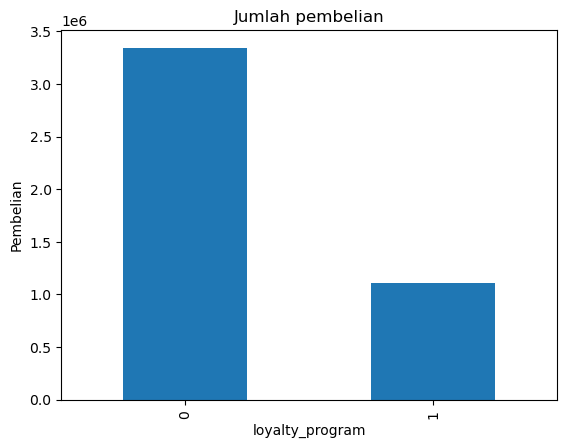

In [35]:
total_order.plot(kind='bar', title='Jumlah pembelian', ylabel='Pembelian')

Dari hasil pembelian pelanggan non member total pembeliannya yaitu sekitar 3.5 juta, sedangakan pelanggan yang member hasilnya lebih sedikit dibandingkan pelanggan non member yaitu sekitar 1.2 juta.

In [36]:
# Rata-rata pembelian
avg_order = data_.groupby('loyalty_program')['quantity'].agg('mean')
avg_order

loyalty_program
0    13.217234
1    13.702880
Name: quantity, dtype: float64

<Axes: title={'center': 'Rata-rata pembelian'}, xlabel='loyalty_program', ylabel='Pembelian'>

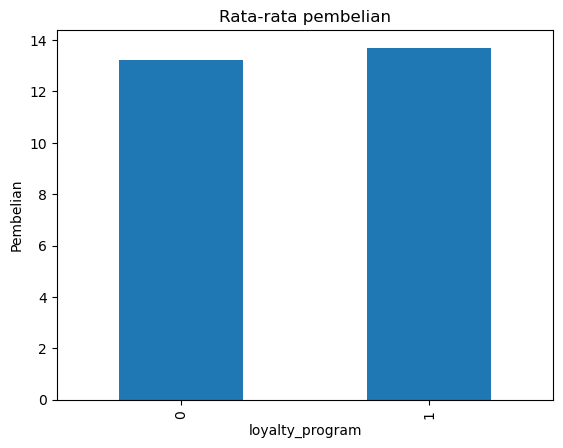

In [37]:
avg_order.plot(kind='bar', title='Rata-rata pembelian', ylabel='Pembelian')

Rata-rata pembelian pelanggan member sedikit lebih besar yaitu sekitar 13.7 dibandingkan rata-rata pembelian pelanggan yang non member yaitu 13.2. Hal ini mungkin dikarenakan pelanggan yang member membeli barang-barag di toko retail dengan quantity lebih banyak dibandingkan pelanggan yang non member, walaupun jumlah pelanggan member lebih sedikit tetapi rata-ratanya lebih besar dibandingkan pelanggan yang non member.

### Menganalisis perubahan ukuran pembelian rata-rata untuk setiap kohort untuk yang member dengan non-member

- **Cohort perminggu**

In [38]:
# membuat kolom cohort per minggu untuk pembelian pertama pelanggan
data_['cohort'] = data_.groupby('customerid')['date'].transform('min').astype('datetime64[W]')
data_.head()

C:\Users\VISKA\AppData\Local\Temp\ipykernel_2832\3618940750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['cohort'] = data_.groupby('customerid')['date'].transform('min').astype('datetime64[W]')


,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week,productid,price_per_one,total_price,cohort
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.25,13.75,2016-12-01
1,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,3.36,36.96,2016-12-01
2,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,0.42,4.62,2016-12-01
3,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.66,18.26,2016-12-01
4,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.63,17.93,2016-12-01


In [39]:
# membuat kolom cohort per bulan untuk pembelian pertama pelanggan
data_['cohort_month'] = data_.groupby('customerid')['date'].transform('min').astype('datetime64[M]')
data_.head()

C:\Users\VISKA\AppData\Local\Temp\ipykernel_2832\3819604357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['cohort_month'] = data_.groupby('customerid')['date'].transform('min').astype('datetime64[M]')


,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week,productid,price_per_one,total_price,cohort,cohort_month
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.25,13.75,2016-12-01,2016-12-01
1,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,3.36,36.96,2016-12-01,2016-12-01
2,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,0.42,4.62,2016-12-01,2016-12-01
3,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.66,18.26,2016-12-01,2016-12-01
4,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.63,17.93,2016-12-01,2016-12-01


In [40]:
# Membuat kolom periode waktu per minggu untuk tiap pelanggan
data_['period_number'] = (data_.session_week - data_.cohort).dt.days
data_.head()

C:\Users\VISKA\AppData\Local\Temp\ipykernel_2832\3006792764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['period_number'] = (data_.session_week - data_.cohort).dt.days


,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week,productid,price_per_one,total_price,cohort,cohort_month,period_number
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.25,13.75,2016-12-01,2016-12-01,7
1,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,3.36,36.96,2016-12-01,2016-12-01,7
2,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,0.42,4.62,2016-12-01,2016-12-01,7
3,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.66,18.26,2016-12-01,2016-12-01,7
4,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.63,17.93,2016-12-01,2016-12-01,7


In [41]:
# Membuat kolom periode waktu per bulan untuk tiap pelanggan
data_['period_number_month'] = (data_.session_month - data_.cohort_month).dt.days
data_.head()

C:\Users\VISKA\AppData\Local\Temp\ipykernel_2832\4029214937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['period_number_month'] = (data_.session_month - data_.cohort_month).dt.days


,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week,productid,price_per_one,total_price,cohort,cohort_month,period_number,period_number_month
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.25,13.75,2016-12-01,2016-12-01,7,0
1,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,3.36,36.96,2016-12-01,2016-12-01,7,0
2,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,0.42,4.62,2016-12-01,2016-12-01,7,0
3,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.66,18.26,2016-12-01,2016-12-01,7,0
4,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.63,17.93,2016-12-01,2016-12-01,7,0


In [42]:
# Mengelompokan berdasarkan pelanggan yang member
data_member = data_[data_['loyalty_program'] == 1]
data_member.head()

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week,productid,price_per_one,total_price,cohort,cohort_month,period_number,period_number_month
28,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,2017-01-19,2017-01-01,2017-01-01,2017-01-19,21873,1.25,43.75,2016-12-08,2016-12-01,42,31
29,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,2017-01-19,2017-01-01,2017-01-01,2017-01-19,21873,3.36,117.60,2016-12-08,2016-12-01,42,31
30,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,2017-01-19,2017-01-01,2017-01-01,2017-01-19,21873,0.42,14.70,2016-12-08,2016-12-01,42,31
31,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,2017-01-19,2017-01-01,2017-01-01,2017-01-19,21873,1.66,58.10,2016-12-08,2016-12-01,42,31
32,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,2017-01-19,2017-01-01,2017-01-01,2017-01-19,21873,1.63,57.05,2016-12-08,2016-12-01,42,31


In [43]:
# Mengelompokan berdasarkan pelanggan yang non member
data_non_member = data_[data_['loyalty_program'] == 0]
data_non_member.head()

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,date,session_year,session_month,session_week,productid,price_per_one,total_price,cohort,cohort_month,period_number,period_number_month
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.25,13.75,2016-12-01,2016-12-01,7,0
1,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,3.36,36.96,2016-12-01,2016-12-01,7,0
2,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,0.42,4.62,2016-12-01,2016-12-01,7,0
3,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.66,18.26,2016-12-01,2016-12-01,7,0
4,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-01-01,2016-12-01,2016-12-08,21873,1.63,17.93,2016-12-01,2016-12-01,7,0


In [44]:
def get_cohort_matrix(data, var='customerid', fun=pd.Series.nunique):

    cohort_group = data.groupby(['cohort', 'period_number'])[var].apply(fun).reset_index()

    cohort_pivot = cohort_group.pivot_table(index = 'cohort',

                        columns = 'period_number',

                        values = var)

    cohort_size = cohort_pivot.iloc[:,0]

    retention = cohort_pivot.divide(cohort_size, axis = 0)

    retention = retention.round(3) * 100

    return cohort_pivot, retention

In [45]:
# cohort perminggu member
cohort_pivot, retention = get_cohort_matrix(data_member)
cohort_pivot

period_number,0,7,14,21,28,35,42,49,56,63,70,77,84
cohort,,,,,,,,,,,,,
2016-12-01,161.0,38.0,29.0,4.0,4.0,18.0,22.0,19.0,22.0,18.0,23.0,21.0,13.0
2016-12-08,123.0,24.0,3.0,3.0,8.0,9.0,12.0,15.0,11.0,14.0,15.0,7.0,NaN
2016-12-15,57.0,NaN,2.0,5.0,6.0,6.0,8.0,11.0,7.0,6.0,3.0,NaN,NaN
2016-12-22,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,3.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2017-01-05,41.0,4.0,4.0,3.0,5.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
2017-01-12,22.0,4.0,NaN,1.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-19,29.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,39.0,1.0,5.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# retensi member per minggu
retention

period_number,0,7,14,21,28,35,42,49,56,63,70,77,84
cohort,,,,,,,,,,,,,
2016-12-01,100.0,23.6,18.0,2.5,2.5,11.2,13.7,11.8,13.7,11.2,14.3,13.0,8.1
2016-12-08,100.0,19.5,2.4,2.4,6.5,7.3,9.8,12.2,8.9,11.4,12.2,5.7,NaN
2016-12-15,100.0,NaN,3.5,8.8,10.5,10.5,14.0,19.3,12.3,10.5,5.3,NaN,NaN
2016-12-22,100.0,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,100.0,33.3,33.3,33.3,33.3,33.3,NaN,66.7,NaN,NaN,NaN,NaN,NaN
2017-01-05,100.0,9.8,9.8,7.3,12.2,7.3,2.4,7.3,NaN,NaN,NaN,NaN,NaN
2017-01-12,100.0,18.2,NaN,4.5,13.6,9.1,13.6,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-19,100.0,NaN,NaN,3.4,3.4,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,100.0,2.6,12.8,7.7,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Retensi member per minggu'}, xlabel='period_number', ylabel='cohort'>

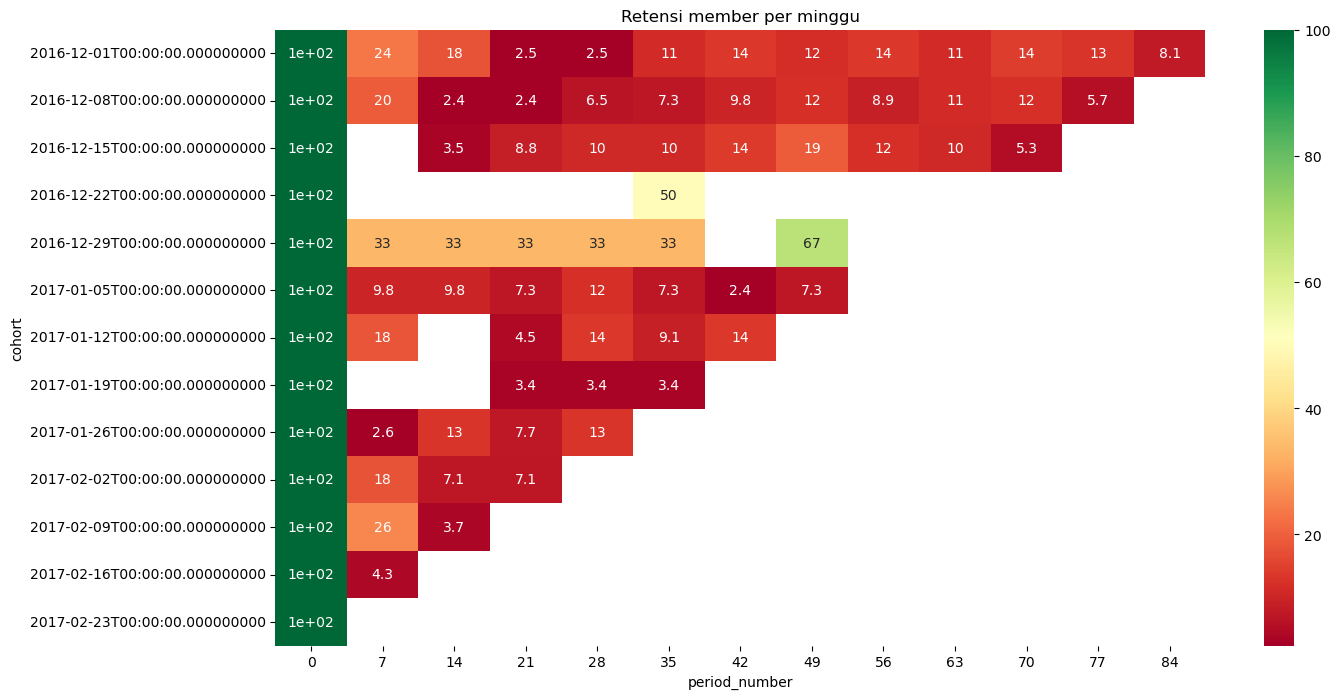

In [47]:
plt.figure(figsize=(15,8))
plt.title('Retensi member per minggu')
sns.heatmap(retention, cmap='RdYlGn', annot=True)

- 24% Pelanggan member yang diperoleh pada tanggal 2016-12-01 kembali pada minggu berikutnya
- 20% pelanggan member yang diperoleh pada tanggal 2016-12-08 kembali
- Pada tanggal 2016-12-22 hingga tanggal 2016-12-29 walaupun tingkat retensinya tinggi tetapi rata- jumlah pelanggan yang datang hanya sedikit ini mungkin dikarenakan pelanggan mayoritas banyak yang liburan karena bertepatan dengan libur natal dan akhir tahun.

In [48]:
# cohort perminggu non member
cohort_pivot, retention = get_cohort_matrix(data_non_member)
cohort_pivot

period_number,0,7,14,21,28,35,42,49,56,63,70,77,84
cohort,,,,,,,,,,,,,
2016-12-01,290.0,77.0,63.0,10.0,12.0,71.0,45.0,39.0,46.0,44.0,49.0,37.0,40.0
2016-12-08,192.0,36.0,5.0,2.0,33.0,23.0,25.0,32.0,14.0,25.0,28.0,8.0,NaN
2016-12-15,108.0,4.0,1.0,13.0,9.0,10.0,15.0,7.0,6.0,7.0,10.0,NaN,NaN
2016-12-22,13.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2016-12-29,12.0,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2017-01-05,83.0,9.0,4.0,9.0,5.0,7.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
2017-01-12,70.0,12.0,8.0,4.0,3.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-19,75.0,7.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,74.0,5.0,7.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Retensi non member per minggu
retention

period_number,0,7,14,21,28,35,42,49,56,63,70,77,84
cohort,,,,,,,,,,,,,
2016-12-01,100.0,26.6,21.7,3.4,4.1,24.5,15.5,13.4,15.9,15.2,16.9,12.8,13.8
2016-12-08,100.0,18.8,2.6,1.0,17.2,12.0,13.0,16.7,7.3,13.0,14.6,4.2,NaN
2016-12-15,100.0,3.7,0.9,12.0,8.3,9.3,13.9,6.5,5.6,6.5,9.3,NaN,NaN
2016-12-22,100.0,NaN,7.7,7.7,7.7,7.7,NaN,NaN,7.7,7.7,NaN,NaN,NaN
2016-12-29,100.0,16.7,NaN,NaN,NaN,8.3,NaN,8.3,NaN,NaN,NaN,NaN,NaN
2017-01-05,100.0,10.8,4.8,10.8,6.0,8.4,9.6,6.0,NaN,NaN,NaN,NaN,NaN
2017-01-12,100.0,17.1,11.4,5.7,4.3,11.4,8.6,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-19,100.0,9.3,6.7,6.7,6.7,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,100.0,6.8,9.5,1.4,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Retensi member per bulan'}, xlabel='period_number', ylabel='cohort'>

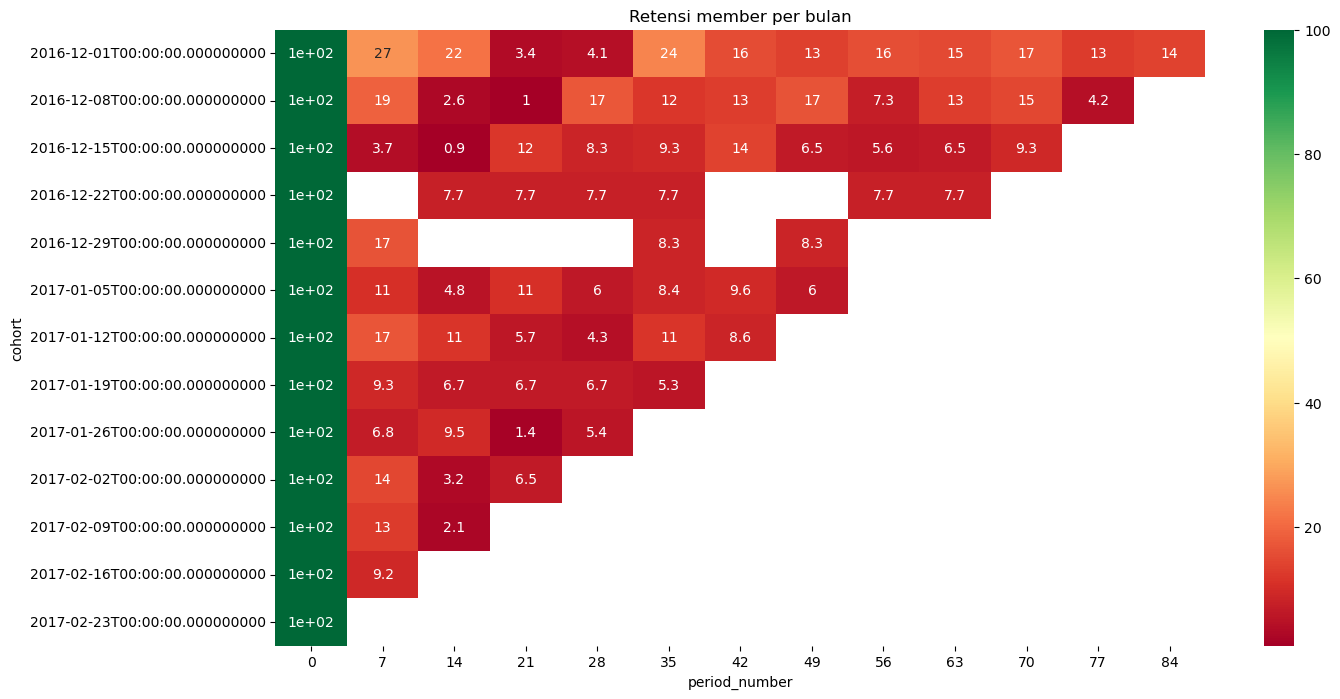

In [50]:
plt.figure(figsize=(15,8))
plt.title('Retensi member per bulan')
sns.heatmap(retention, cmap='RdYlGn', annot=True)

- 27% Pelanggan non member yang diperoleh pada tanggal 2016-12-01 kembali pada minggu berikutnya, nilai ini lebih tinggi dibandingkan yang member
- 19% pelanggan member yang diperoleh pada tanggal 2016-12-08 kembali
- Pada tanggal 2016-12-22 hingga tanggal 2016-12-29 sama kasusnya seperti kelompok pelanggan yang member mungkin dikarenakan pelanggan mayoritas banyak yang liburan karena bertepatan dengan libur natal dan akhir tahun.

- **Cohort perbulan**

In [51]:
def get_cohort_matrix_month(data, var='customerid', fun=pd.Series.nunique):

    cohort_group = data.groupby(['cohort_month', 'period_number_month'])[var].apply(fun).reset_index()

    cohort_pivot = cohort_group.pivot_table(index = 'cohort_month',

                        columns = 'period_number_month',

                        values = var)

    cohort_size = cohort_pivot.iloc[:,0]

    retention = cohort_pivot.divide(cohort_size, axis = 0)

    retention = retention.round(3) * 100

    return cohort_pivot, retention

In [52]:
# cohort perbulan member
cohort_pivot, retention = get_cohort_matrix_month(data_member)
cohort_pivot

period_number_month,0,31,62
cohort_month,,,
2016-12-01,343.0,114.0,121.0
2017-01-01,124.0,30.0,NaN
2017-02-01,117.0,NaN,NaN


In [53]:
# Retensi member perbulan
retention

period_number_month,0,31,62
cohort_month,,,
2016-12-01,100.0,33.2,35.3
2017-01-01,100.0,24.2,NaN
2017-02-01,100.0,NaN,NaN


<Axes: title={'center': 'Retensi member perbulan'}, xlabel='period_number_month', ylabel='cohort_month'>

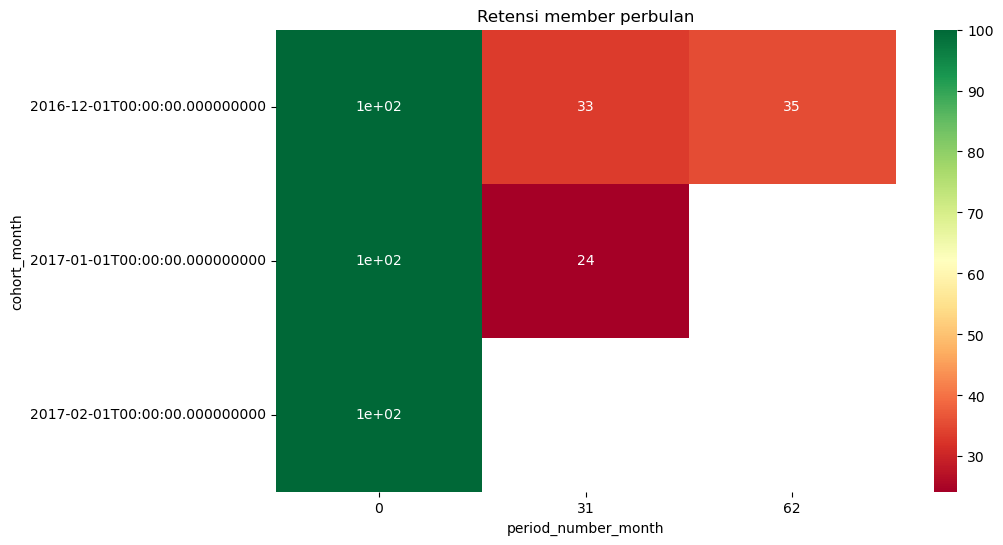

In [54]:
plt.figure(figsize=(10,6))
plt.title('Retensi member perbulan')
sns.heatmap(retention, cmap='RdYlGn', annot=True)

- Berdasarkan retensi pelanggan perbulan 33% pelanggan member yang didapatkan dari tanggal 2016-12-01 kembali pada bulan berikutnya, pada bulan ke 3 lebih besar 35%
- pelanggan member yang didapatkan pada tanggal 2017-01-01 datang kembali dibulan berikutnya sebesar 24%.

In [55]:
# Cohort perbulan non member
cohort_pivot, retention = get_cohort_matrix_month(data_non_member)
cohort_pivot

period_number_month,0,31,62
cohort_month,,,
2016-12-01,603.0,246.0,197.0
2017-01-01,296.0,70.0,NaN
2017-02-01,258.0,NaN,NaN


In [56]:
# Retensi non member perbulan
retention

period_number_month,0,31,62
cohort_month,,,
2016-12-01,100.0,40.8,32.7
2017-01-01,100.0,23.6,NaN
2017-02-01,100.0,NaN,NaN


<Axes: title={'center': 'Retensi non member perbulan'}, xlabel='period_number_month', ylabel='cohort_month'>

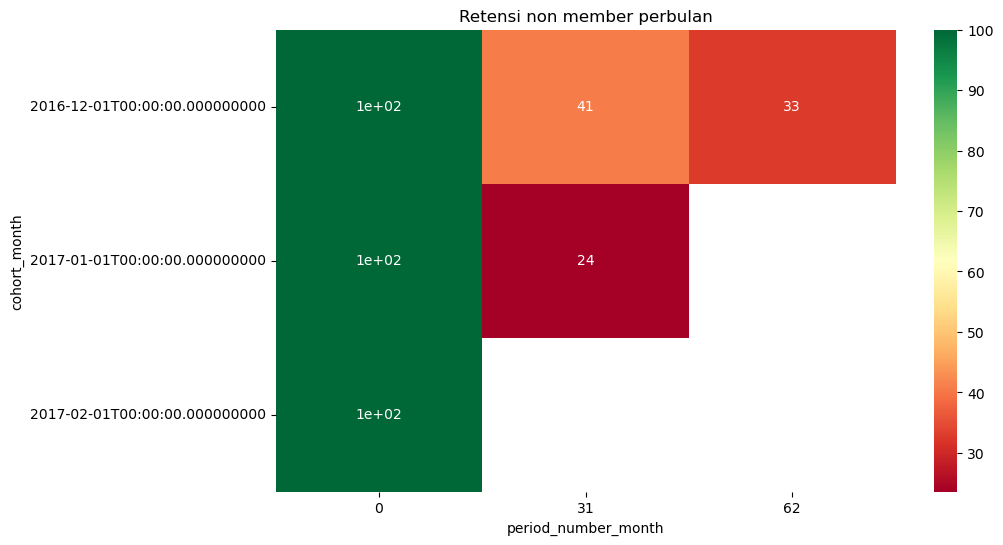

In [57]:
plt.figure(figsize=(10,6))
plt.title('Retensi non member perbulan')
sns.heatmap(retention, cmap='RdYlGn', annot=True)

- Nilai retensi pelanggan non member lebih besar dibandingkan pelanggan yang member
- Pelanggan yang didapatkan pada tanggal 2016-12-01 datang kembali dibulan berikutnya sebanyak 41%, kemudian pada bulan ke 3 sebesar 33%
- Pelanggan yang didapatkan pada tanggal 2017-01-01 datang kembali dibulan berikutnya sebanyakk 24%

### Merumuskan dan menguji hipotesis statistik

- **Uji hipotesis rata-rata pelanggan yang melakukan pembelian antara member dengan non-member adalah sama**

H0 : Rata-rata pelanggan yang melakukan pembeian antara member dengan non-member adalah sama.

H1 : Rata-rata pelanggan yang melakukan pembeian antara member dengan non-member adalah berbeda.

nilai alpha yaitu 5%

In [58]:
data['purchaseid'].unique()

array(['538280', '541104', '540418', ..., '542556', '538144', '540560'],
      dtype=object)

In [59]:
price_data = data.groupby('loyalty_program')['total_price'].agg(['mean', 'var'])
price_data

,mean,var
loyalty_program,,
0,42.296130,1.780932e+06
1,59.735964,8.933338e+05


In [60]:
data_member = data[data['loyalty_program'] == 1]
data_non_member = data[data['loyalty_program'] == 0]

In [61]:
sample_1 = data_non_member['total_price']
sample_2 = data_member['total_price']

In [62]:
sample_1

0         13.75
1         36.96
2          4.62
3         18.26
4         17.93
          ...  
504946     8.25
504948     0.00
504951     0.00
504952     2.10
504953     9.90
Name: total_price, Length: 399734, dtype: float64

In [63]:
st.levene(sample_1, sample_2)

LeveneResult(statistic=13.136193545953933, pvalue=0.0002896741296281096)

pvalue kurang dari alpha maka equal_var = False

In [64]:
alpha = 0.05
results = st.ttest_ind(sample_1,
                     sample_2,
                     equal_var=False)

In [65]:
results.pvalue

1.2534826341953184e-06

In [66]:
# Uji hipotesisnya
if (results.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Tolak null hypothesis


Hasil hipotesis menunjukan Tolak null hypotesis atau H1, artinya Rata-rata pendapatan antara pelanggan member dengan non-member adalah berbeda

- **UJi hipotesis rata-rata pembelian pelanggan member dengan non-member adalah sama.**

H0 : Rata-rata pembelian antara pelanggan member dengan non-member adalah sama.

H1 : Rata-rata pembelian antara pelanggan member dengan non-member adalah berbeda

nilai alpha yaitu 5%

In [67]:
quantity_data = data.groupby('loyalty_program')['quantity'].agg(['mean', 'var'])
quantity_data

,mean,var
loyalty_program,,
0,8.369068,30852.087545
1,10.530850,2985.966402


In [68]:
data_member = data[data['loyalty_program'] == 1]
data_non_member = data[data['loyalty_program'] == 0]

In [69]:
sample_1_quantity = data_non_member['quantity']
sample_2_quantity = data_member['quantity']

In [70]:
st.levene(sample_1_quantity, sample_2_quantity)

LeveneResult(statistic=8.93344308690247, pvalue=0.002800095029556351)

pvalue kurang dari alpha maka equal_var = False

In [71]:
alpha = 0.05

In [72]:
pvalue=0.002800095029556351

In [73]:
results_quantity = st.ttest_ind(sample_1_quantity,
                     sample_2_quantity,
                     equal_var=False)

In [74]:
results_quantity.pvalue

2.8613452016155362e-11

In [75]:
# Uji hipotesisnya
if (results.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Tolak null hypothesis


Hasil hipotesis menunjukan Tolak null hypotesis atau H1, artinya Rata-rata pembelian antara pelanggan member dengan non-member adalah berbeda

## Kesimpulan

Berdasarkan analisis data pada dataset retail dan product hasil analisisnya yaitu:
1. Rata-rata jumlah pelanggan yang mengunjungi retail Home World setiap bulannya terlihat bahwa pelanggan yang non member lebih banyak dari pada pelanggan yang member.
2. Pada minggu ke 4 dan ke 5 tepatnya minggu-minggu di akhir tahun jumlah pelanggan yang melakukan pembelian di toko Home World lebih sedikit dibandingkan di minggu-minggu yang lain. Hal ini mungkin karena diakhir tahun banyak pelanggan yang melakukan liburan natal dan liburan akhir tahun sehingga sedikit yang berbelanja di toko retail.
3. Hasil pembelian pelanggan non member total pembeliannya yaitu sekitar 3.5 juta, sedangakan pelanggan yang member hasilnya lebih sedikit dibandingkan pelanggan non member yaitu sekitar 1.2 juta.
4. Rata-rata pembelian pelanggan member sedikit lebih besar yaitu sekitar 13.7 dibandingkan rata-rata pembelian pelanggan yang non member yaitu 13.2. Hal ini mungkin dikarenakan pelanggan yang member membeli barang-barang di toko retail dengan quantity lebih banyak dibandingkan pelanggan yang non member, walaupun jumlah pelanggan member lebih sedikit tetapi rata-ratanya lebih besar dibandingkan pelanggan yang non member.
5. Pembelian rata-rata pada setiap cohort menujukan bahwa 33% pelanggan member yang didapatkan dari tanggal 2016-12-01 kembali pada bulan berikutnya, pada bulan ke 3 lebih besar 35%. sedangkan Pelanggan yang non member datang kembali dibulan berikutnya sebanyak 41%, kemudian pada bulan ke 3 sebesar 33%. Nilai retensi cohort pelanggan non member lebih besar dibandingkan pelanggan yang member.
5. Hasil hipotesis pada rata-rata pembelian dan pendapatan dari pelanggan non member dan member menunjukan bahwa rata-ratanya berbeda. karena dapat dilihat rata-rata pelanggan yang member lebih besar dibandingkan pelanggan non member.

Berdasarkan poin-poin diatas dapat disimpulkan bahwa jumlah pelanggan yang mengunjungi retail Home World lebih banyak pelanggan non member dari pada pelanggan yang member, tetapi jika dilihat dari pembelian rata-rata dan jumlah item dalam keranjang pelanggan yang member lebih besar dibandingkan pelanggan yang non member. Hal ini memperlihatkan bahwa pelanggan member melakukan pembelian dengan quantity lebih banyak walaupun jumlah pelanggan member lebih sedikit. Hal ini memperlihatkan bahwa program loyalitas yang telah dilakukan memang efektif untuk meningkatkan jumlah item dalam keranjang dan pembelian tetapi perlu dipikirkan kembali strategi lain untuk tim pemasaran agar banyak pelanggan yang beralih ke program loyalitas pelanggan, strategi yang perlu dilakukan mungkin seperti meningkatkan kualitas produk, meningkatkan pelayanan dan mempertahankan pelanggan yang memberikan loyalitas tinggi pada perusahaan seperti memberikan promosi member atau discount member, sehingga dapat lebih banyak menarik pelanggan untuk dapat beralih ke program loyalitas pelanggan.

**Dashboard :**
https://public.tableau.com/app/profile/viska.aulia/viz/RetailHomeWorld/Dashboard1

**Presentasi:** https://docs.google.com/presentation/d/1AK9I6j6gfYimKp-OAiql-xLS19_fQml9nBeWQwxj2R8/edit?usp=sharing